# Regressão Linear
Grupo:

Vinícius Almeida Bernardino de Souza | RM: 97888

Jessica Witzler Costacurta | RM: 99068
## Importanto bibliotecas necessárias

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Carregando o dataset usando pandas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ViniciusBerns/RegressaoLinear/main/car%20data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Fazendo tratamento dos dados que serão usados para a regressão

In [27]:
dados_filtrados = df[['Year','Present_Price']]
dados_filtrados['Value'] = (df['Present_Price'] - df['Selling_Price'])
dados_filtrados

<ipython-input-27-7ab6d1295d7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['Value'] = (df['Present_Price'] - df['Selling_Price'])


,Year,Present_Price,Value
0,2014,5.59,2.24
1,2013,9.54,4.79
2,2017,9.85,2.60
3,2011,4.15,1.30
4,2014,6.87,2.27
...,...,...,...
296,2016,11.60,2.10
297,2015,5.90,1.90
298,2009,11.00,7.65
299,2017,12.50,1.00


## Separando os dados entre treino e teste para o modelo

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dados_filtrados[['Year']], dados_filtrados['Value'], test_size=0.2, random_state=42)

### Criação do modelo

In [29]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [30]:
y_prev = modelo.predict(X_test)

## Cálculo da mediana de erro e coeficiente de determinação

mse (mean squared error) mede a média do quadrado dos erros, ou seja, a média ao quadrado da diferença entre as previsões e os valores reais.

r2 (r quadrado), o coeficiente de determinação, mede a proporção da variação na variável dependente que é previsível a partir da variável independente. Serve para dizer o quão bem a varíavel independente explica as variações da variável dependente.

## Leitura da MSE e R2
mse: quanto mais próxima de 0, mais precisa a previsão do modelo.

r2: por estar entre 0 e 1, isso diz que o modelo explica uma parte da variação dos valores.

In [39]:
mse = mean_squared_error(y_test, y_prev)

r2 = r2_score(y_test, y_prev)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12.444661718449234
R-squared: 0.25133482203275725


## Plotando o gráfico

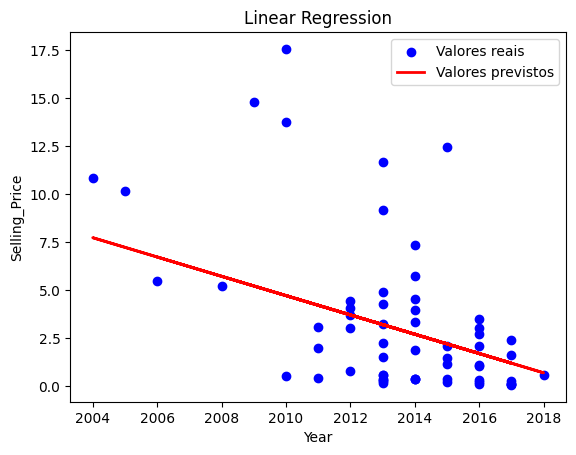

In [38]:
plt.scatter(X_test, y_test, color='blue', label='Valores reais')
plt.plot(X_test, y_prev, color='red', linewidth=2, label='Valores previstos')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.legend()
plt.show()